# Homework 3

**Bootstrap and Testing**

1. Test the hypothesis that the survival rates for female passengers in Pclass 1 was no larger than in Pclass 2.
2. Create a boxplot `mpg ~ cylinders`. It does seem that the mpg for cars with 4 cylinders is quite different from those with 3 cylinders. What does a bootstrap test tell you about this hypothesis?
3. Can you think of more interesting hypotheses to test regarding the pregnancy data ?

In [1]:
%run ../ourFunctions.py

## Task 1
Test the hypothesis that the survival rates for female passengers in Pclass 1 was no larger than in Pclass 2.

In [2]:
#Titanic data:
import seaborn as sns
titanic = sns.load_dataset('titanic')

### Approach 1 

In [36]:
# Survival rate per class and sex
surv_rate_group = titanic[['survived', 'pclass', 'sex']].groupby(["pclass", "sex"]).mean()

# Survival rate for female passengers in Pclass 1 and Pclass 2
surv_rate_pcf1 = surv_rate_group.xs(key="female",level=1).iloc[0,0]
surv_rate_pcf2 = surv_rate_group.xs(key="female",level=1).iloc[1,0]

print("Survival rate for female passengers in Pclass 1",round(surv_rate_pcf1,2))
print("Survival rate for female passengers in Pclass 2",round(surv_rate_pcf2,2))

Survival rate for female passengers in Pclass 1 0.97
Survival rate for female passengers in Pclass 2 0.92


**ANSWER**: The survival rate for female passengers in Pclass 2 was lower than for the female passengers in Pclass 1 

### Approach 2

In [47]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

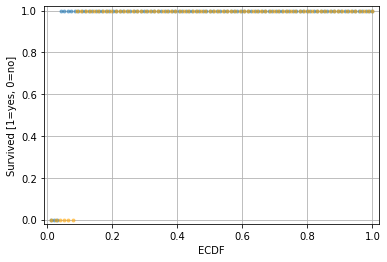

In [56]:
titanic_small = titanic[['survived', 'pclass', 'sex']]

# Filter df for female passengers in Pclass 1 and Pclass 2 
pcf1 =titanic_small[(titanic_small["sex"]=="female") & (titanic_small["pclass"]==1)]["survived"]
pcf2 =titanic_small[(titanic_small["sex"]=="female") & (titanic_small["pclass"]==2)]["survived"]

# Compute ECDF for female passengers in class 1 and 2 
x_1, y_1 = ecdf(pcf1)
x_2, y_2 = ecdf(pcf2)

# Plot all ECDFs on the same plot
plt.plot(y_1, x_1, marker = '.', linestyle = 'none', alpha=0.5)
plt.plot(y_2, x_2, marker = '.', linestyle = 'none', alpha=0.5, color="orange")

# Make nice margins
plt.margins(0.02)
plt.ylabel("Survived [1=yes, 0=no]")
plt.xlabel("ECDF")

# Add grid
plt.grid()

**ANSWER**: The survival rate for female passengers in Pclass 2 was lower than for the female passengers in Pclass 1 

## Task 2
Create a boxplot `mpg ~ cylinders`. It does seem that the mpg for cars with 4 cylinders is quite different from those with 3 cylinders. What does a bootstrap test tell you about this hypothesis?

In [3]:
#Auto data:
cars = pd.read_csv('../data/Auto.csv')

## Task 3
Can you think of more interesting hypotheses to test regarding the pregnancy data ?

In [13]:
#pregnancy data:
#preg=pd.read_hdf('../data/pregNSFG.h5', 'df')
preg = pd.read_csv("../data/pregNSFG.csv.gz").drop(["Unnamed: 0"],axis=1)

#only look at live births
live = preg[preg.outcome == 1]
live.head()

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875
